In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=f700cea1962452b2c88aee6e5c9963acb8ace17fe78f330a4f666bfae7568db7
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import os

# Create a folder named "new_folder"
os.makedirs("Images", exist_ok=True)

[False] [0.69872439]


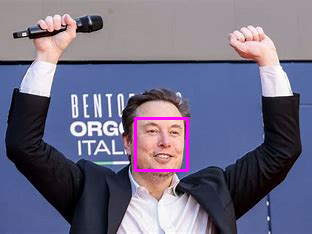

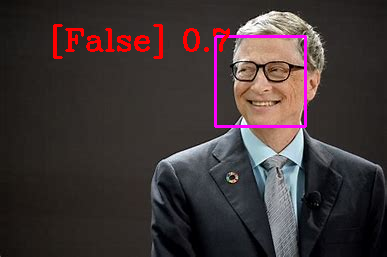

In [16]:
import cv2
import face_recognition
from google.colab.patches import cv2_imshow


imgElon = face_recognition.load_image_file('Images/Elon Musk.jpg')
imgElon = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)
imgTest = face_recognition.load_image_file('Images/Bill Gates.jpg')
imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB)

faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)

faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]
cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)

results = face_recognition.compare_faces([encodeElon],encodeTest)
faceDis = face_recognition.face_distance([encodeElon],encodeTest)
print(results,faceDis)
cv2.putText(imgTest,f'{results} {round(faceDis[0],2)}',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

cv2_imshow(imgElon)
cv2_imshow(imgTest)

In [6]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime

path = 'Images'
images = []
classNames = []
myList = os.listdir(path)
myList.pop(2)
myList.pop(3)
print(myList)


['Bill Gates.jpg', 'Jackie Chan.jpg', 'Elon Musk.jpg']


In [7]:

for cl in myList:
  curImg = cv2.imread(f'{path}/{cl}')
  images.append(curImg)
  classNames.append(os.path.splitext(cl)[0])
print(classNames)


['Bill Gates', 'Jackie Chan', 'Elon Musk']


Encoding Complete


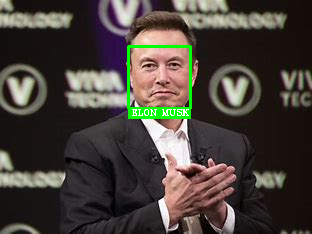

In [35]:

def findEncodings(images):
  encodeList = []
  for img in images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    encode = face_recognition.face_encodings(img)[0]
    encodeList.append(encode)
  return encodeList

def markAttendance(name):
  with open('/content/Attendence.csv','r+') as f:
    myDataList = f.readlines()
    nameList = []
    for line in myDataList:
      entry = line.split(',')
      nameList.append(entry[0])
    if name not in nameList:
      now = datetime.now()
      dtString = now.strftime('%H:%M:%S')
      f.writelines(f'\n{name},{dtString}')

encodeListKnown = findEncodings(images)
print('Encoding Complete')

img = cv2.imread('/content/Images/Elon Musk 2.jpg')

# while True:
#   success, img = cap.read()
  # print('image',img)
  # imgS = cv2.resize(img,(0,0),None,0.25,0.25)
imgS = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

facesCurFrame = face_recognition.face_locations(imgS)
encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)

for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
  matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
  faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
  #print(faceDis)
  matchIndex = np.argmin(faceDis)

  if matches[matchIndex]:
    name = classNames[matchIndex].upper()
    #print(name)
    y1,x2,y2,x1 = faceLoc
    # y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.rectangle(img,(x1,y2+10),(x2,y2),(0,255,0),cv2.FILLED)
    cv2.putText(img,name,(x1+3,y2+7),cv2.FONT_HERSHEY_COMPLEX,0.3,(255,255,255),1)
    markAttendance(name)

cv2_imshow(img)
# if cv2.waitKey(1) & 0xFF == ord('q'):
#       break